In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

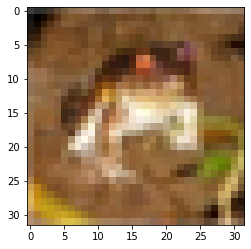

In [9]:
img = plt.imshow(x_train[0])

In [10]:
y_train_one_hot = to_categorical(y_train, 10) #10 because we have 10 classes.
y_test_one_hot = to_categorical(y_test, 10)

In [11]:
x_train[0].shape

(32, 32, 3)

In [12]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
y_train_one_hot.shape

(50000, 10)

In [17]:
y_test_one_hot.shape

(10000, 10)

In [18]:
history = model.fit(
    x_train, 
    y_train_one_hot,
    epochs=100, 
    batch_size = 32,
    validation_data = (x_test, y_test_one_hot), 
    callbacks = [custom_early_stopping]
)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3286 - accuracy: 0.5445 - val_loss: 1.0857 - val_accuracy: 0.6314
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8437 - accuracy: 0.7070 - val_loss: 1.0632 - val_accuracy: 0.6376
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6950 - accuracy: 0.7601 - val_loss: 0.7925 - val_accuracy: 0.7320
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5797 - accuracy: 0.8026 - val_loss: 0.6489 - val_accuracy: 0.7836
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4960 - accuracy: 0.8313 - val_loss: 0.7693 - val_accuracy: 0.7448
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4207 - accuracy: 0.8562 - val_loss: 0.6841 - val_accuracy: 0.7859
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3536 - accuracy: 0.8786 - val_loss: 0.6275 - val_a

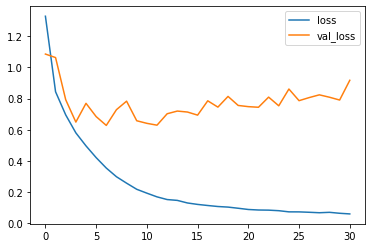

In [20]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

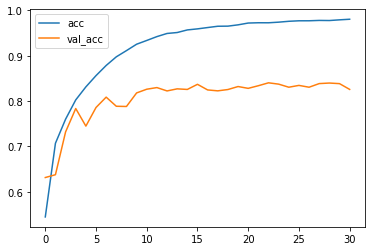

In [21]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9172 - accuracy: 0.8258


0.8258000016212463

In [23]:
model.save('my_cifar10_model.h5')

In [25]:
my_image = plt.imread("Cat1.jpg")

In [26]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

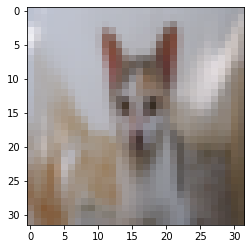

In [27]:
img = plt.imshow(my_image_resized)

In [28]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [33]:
probabilities

array([[1.64953320e-07, 4.62643986e-12, 1.02395290e-07, 9.50269103e-01,
        2.52187601e-04, 4.94774431e-02, 5.94657390e-09, 9.98879955e-07,
        1.15642475e-10, 1.04285380e-09]], dtype=float32)

In [30]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.9502691
Second most likely class: dog -- Probability: 0.049477443
Third most likely class: deer -- Probability: 0.0002521876
Fourth most likely class: horse -- Probability: 9.9888e-07
Fifth most likely class: airplane -- Probability: 1.6495332e-07


In [34]:
index

array([1, 8, 9, 6, 2, 0, 7, 4, 5, 3])